# OOPS - Problems with Copy Constructor
___

+ Deep Copy Constructor


## Types of Constructors

1. Default (by compiler; built-in)
2. Non Parameterized 
3. Parameterized
4. Copy Constructor

In [1]:
#include <iostream>
#include <climits>
#include <math.h>
using namespace std;

## Problems with Copy Construction
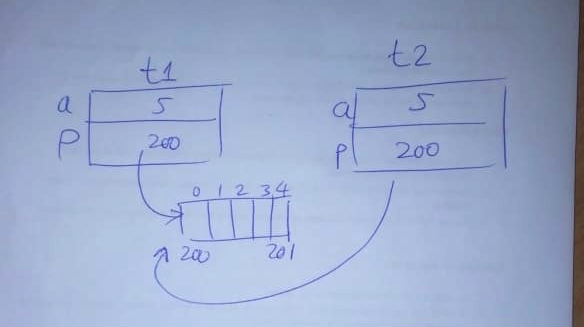


Remember when we make a copy, we need to make a copy, i.e. we cannot usr the other ones address spaces. 

The problem is with:

```
Test (Test &t){
        a = t.a;
        p = t.p;
 }

```

```
cout<<t1.p<<endl has adresss: 0x55ad5c7a5ad0
cout<<t2.p<<endl has adresss: 0x55ad5c7a5ad0

```
This is a problem as they share the same address

That is t1 and t2 points to the same address


##  Deep Copy Constructor
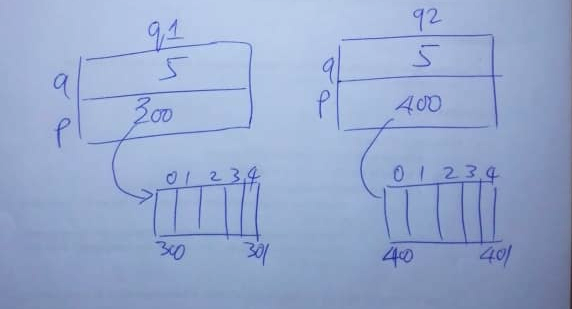

We need to fix this with:

```
Test (Test &t){
        a = t.a;
        p = new int [a];
}

```

This is called the **Deep Copy Constructor**. Meaning it does the best job in copying. NOT Aliasing or Nicknaming


Now the problem is fixed (different addresses):

```
cout<<q1.p<<endl has adresss: 0x55b2c787b1e0
cout<<q2.p<<endl has adresss: 0x55b2c5ef8540

```

Again, we see the 


In [2]:
class Test{
public:  
    int a;
    int *p;
public: 
    
    Test(int x){
        a = x;
        p = new int[x];
    }
    
    
    Test (Test &t){
        a = t.a;
        p = t.p;
    }
    
    
    
}

In [3]:
Test t1(5);

In [4]:
cout<<t1.a<<endl;
cout<<&t1.a<<endl;
cout<<t1.p<<endl;


5
0x7f000e2ca028
0x55bc8a52dc90


In [5]:
Test t2(t1);

In [6]:
cout<<t2.a<<endl;
cout<<&t2.a<<endl;
cout<<t2.p<<endl;


5
0x7f000e2ca038
0x55bc8a52dc90


### Lets modify t1 and see if t2 get the same answer (**correct answer: it should NOT**)

In [7]:
t1.p[0] = 6;
cout<<t1.p[0]<<endl;
cout<<t2.p[0]<<endl;

6
6


In [8]:
t2.p[0] = 7;
cout<<t1.p[0]<<endl;
cout<<t2.p[0]<<endl;

7
7


### This is incorrect

## Redo the aove with the correct definition


In [9]:
class Test2{
public:  
    int a;
    int *p;
public: 
    
    Test2(int x){
        a = x;
        p = new int[x];
    }
    
    
    Test2 (Test2 &t){
        a = t.a;
        p = new int[a];
    }
    
    
}

In [10]:
Test2 q1(5)

In [11]:
cout<<q1.a<<endl;
cout<<&q1.a<<endl;
cout<<q1.p<<endl;


5
0x7f000e2ca048
0x55bc8b0b28e0


In [12]:
Test2 q2(q1);

In [13]:
cout<<q2.a<<endl;
cout<<&q2.a<<endl;
cout<<q2.p<<endl;

5
0x7f000e2ca058
0x55bc8b9ab700


### Lets modify t1 and see if t2 get the same answer (**correct answer: it should NOT**)

In [14]:
q1.p[0] = 6;
cout<<q1.p[0]<<endl;
cout<<q2.p[0]<<endl;

6
-1956344512


In [15]:
q2.p[0] = 7;
cout<<q1.p[0]<<endl;
cout<<q2.p[0]<<endl;

6
7


## This is correct: Changing the one does not affect the other one